# Linear Regression 

We will see how you can make a Linear Regression model from scratch. 

Just to remind yourself, you can use this model anytime you want to predict a quantitative feature $y$ from data input $X$.

From example, 

- The price of a house 
- The daily amount of visitors of a web site
- The revenue of a company
- Etc.

We create this kind of model in a supervised way: we show the algorithm examples as $(X, y)$ so it can learn a model that maps ($X$ $\rightarrow$ $y$).

<img src="linear.png" alt="Elbow plot" width="600">


Our goal is to find the best function $$f(X) = a \times X + b$$

Where : 

- $a$ is the slope 
- $b$ is the $y$- intercept

The best function is the one where $a$ and $b$ are adjusted to fit our dataset $(X,y)$ as welll as possible.

Using an optimization algorithm whose goal is to minimize the error between the model and the dataset.

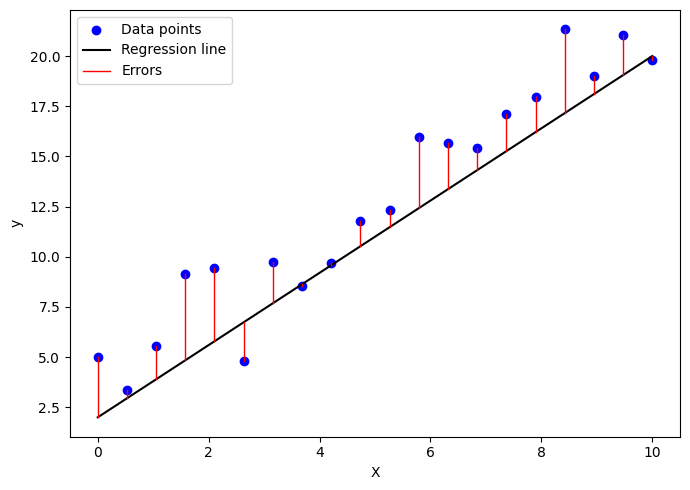

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.linspace(0, 10, 20)
y = 2.0 * X + 1.5 + np.random.normal(0, 2, size=X.shape)


a, b = 1.8, 2.0
y_pred = a * X + b

plt.figure(figsize=(7, 5))


plt.scatter(X, y, color="blue", label="Data points")


plt.plot(X, y_pred, color="black", label="Regression line")


for i, (xi, yi, ypi) in enumerate(zip(X, y, y_pred)):
    if i == 0:
        plt.plot([xi, xi], [yi, ypi], color="red", linewidth=1, label="Errors")
    else:
        plt.plot([xi, xi], [yi, ypi], color="red", linewidth=1)

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


### The cost function 

The purpose of the cost function is to measure the error between each data point and our model (f), then compute the average error.

We call **residual** the difference between the predicted value and the true value $y^i$.  
We denote this difference by $R^i$:

$$
R^i = f(x^i) - y^i
$$


Before summing the residuals, we **square them** to avoid cancellation.  
Positive and negative errors can cancel each other out; squaring ensures every error contributes positively.

Finally, we have:

$$
\mathcal{L}(a,b) = \frac{1}{m} \sum_{i=1}^{m} \left(y^i - f(x^i)\right)^2
$$
Where $m$ is the total number of points in our dataset.

### Shape of the cost function

When we change the model parameters \(w\) and \(b\), the cost function varies and typically forms a **parabolic curve**.  
The plot below shows how the cost changes when we test several models by varying only \(b\) (keeping \(w\) fixed).


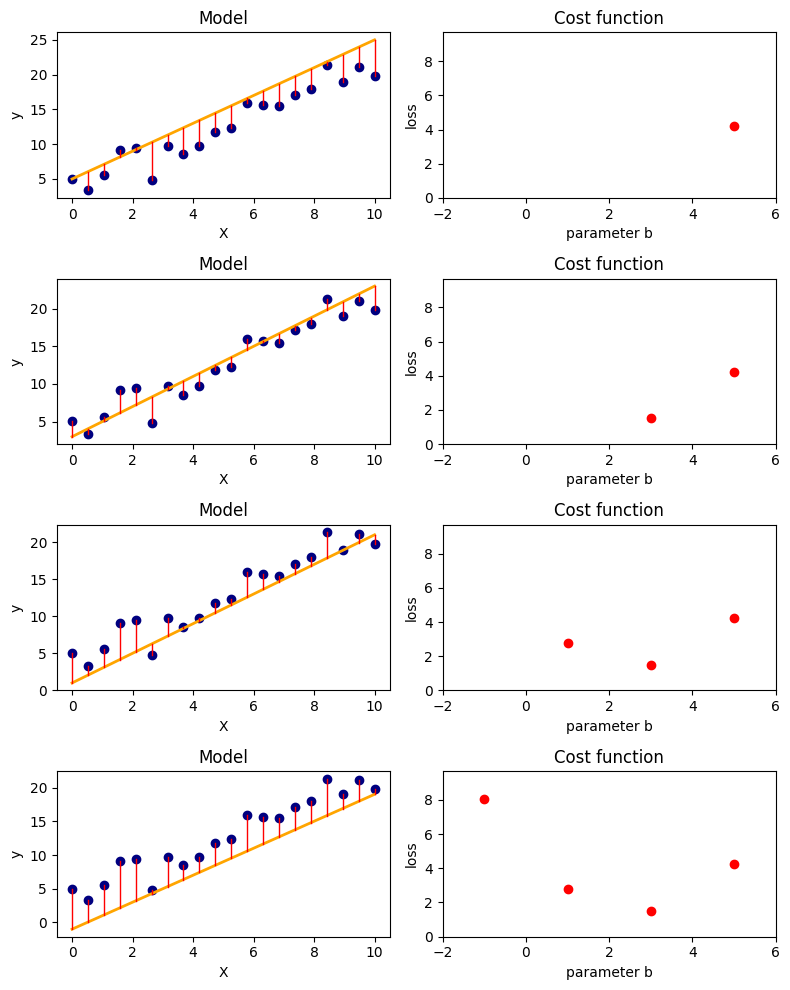

In [2]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.linspace(0, 10, 20)
y = 2.0 * X + 1.5 + np.random.normal(0, 2, size=X.shape)


w = 2.0
b_values = [5, 3, 1, -1]  


def cost(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred)**2)


costs = []
for b in b_values:
    y_pred = w * X + b
    costs.append(cost(y, y_pred))


n = len(b_values)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(8, 2.5*n))

for i, b in enumerate(b_values):
    y_pred = w * X + b


    ax1 = axes[i, 0]
    ax1.scatter(X, y, color="navy")
    ax1.plot(X, y_pred, color="orange", linewidth=2)
    for xi, yi, ypi in zip(X, y, y_pred):
        ax1.plot([xi, xi], [yi, ypi], color="red", linewidth=1)
    ax1.set_title("Model")
    ax1.set_xlabel("X")
    ax1.set_ylabel("y")


    ax2 = axes[i, 1]
    ax2.scatter(b_values[:i+1], costs[:i+1], color="red")
    ax2.set_title("Cost function")
    ax2.set_xlabel("parameter b")
    ax2.set_ylabel("loss")
    ax2.set_xlim(min(b_values)-1, max(b_values)+1)
    ax2.set_ylim(0, max(costs)*1.2)

plt.tight_layout()
plt.show()


We get a similar curve when we vary the parameter (a), the slope.

To find where the cost function reaches its minimum and the values of (a) and (b) that achieve it, we can use gradient descent. Other methods also exist, such as the least squares method.

## Gradient descent 

Gradient descent computes the gradient of the cost function, how the cost changes when $a$ and $b$ vary slightly and then takes a step in the direction that reduces the cost. That’s why it’s called gradient descent.

The algorithm starts from random parameters $(a_0, b_0)$, which define an initial model. From that starting point, it computes the gradient, i.e., the direction of steepest change.

We then take a step in the gradient descent direction, updating the parameters to new values $(a_1, b_1)$.  

These updated parameters define a better model, one that fits the data $(X, y)$ more closely.  

From this new point, we compute the gradient again to continue the optimization process.

By repeating this process, we gradually converge to the minimum of the cost function, which gives us the final model.

That’s the core idea behind gradient descent.  

A useful analogy is a hiker lost in the mountains, trying to reach a car parked at the lowest point in a valley.  

Without a map, the safest strategy is to keep moving in the direction of the steepest downward slope.  

This approach works well as long as there is a single basin in the landscape, which is the assumption for the cost function here.


From a mathematical point of view, the gradient descent algorithm is described by the following formulas:

> $$a_{t+1} = a_t - \eta \times \frac{\partial \mathcal{L}}{\partial a_t}$$
>
> $$b_{t+1} = b_t - \eta \times \frac{\partial \mathcal{L}}{\partial b_t}$$
>
> **Explanation:**  
> In these formulas, we update the values of \(a\) and \(b\) by taking their current values and subtracting the gradient term from each, noted respectively $\frac{\partial \mathcal{L}}{\partial a_t}$ and $\frac{\partial \mathcal{L}}{\partial b_t}$.
>
> $\eta$ represents the learning rate. In our case, we can set $\eta = 1$.


## Python implementation

### Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

### Data for our example

Let's simulate data with the NumPy library. Here, we have 50 points distributed according to the relationship $ y = 1.5x + 3 $.


In [4]:
np.random.seed(0)
m=50
X = pd.Series(np.random.randn(m))
Y = pd.Series(1.5 * X + 3 + np.random.randn(m))

### Loss Function

In [5]:
def loss_function(a, b, X, Y):
    total_error = 0
    for i in range(len(X)):
        x = X.iloc[i]
        y = Y.iloc[i]
        total_error += (y - (a * x + b))**2

    return total_error / float(len(X))

### Derivative of the Loss Function

Below we defined the model as:

$$
f(x_i) = \hat{y}_i = a x_i + b
$$

and the Mean Squared Error (MSE) loss as:

$$
\mathcal{L}(a,b) = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - (a x_i + b)\right)^2
$$

Let:

$$
e_i = y_i - (a x_i + b)
$$

Then:

$$
\mathcal{L}(a,b) = \frac{1}{n}\sum_{i=1}^{n} e_i^2
$$

Using the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial a}
= \frac{1}{n}\sum_{i=1}^{n} 2e_i \frac{\partial e_i}{\partial a}
= \frac{1}{n}\sum_{i=1}^{n} 2e_i(-x_i)
= -\frac{2}{n}\sum_{i=1}^{n} x_i\left(y_i-(a x_i+b)\right)
$$

$$
\frac{\partial \mathcal{L}}{\partial b}
= \frac{1}{n}\sum_{i=1}^{n} 2e_i \frac{\partial e_i}{\partial b}
= \frac{1}{n}\sum_{i=1}^{n} 2e_i(-1)
= -\frac{2}{n}\sum_{i=1}^{n}\left(y_i-(a x_i+b)\right)
$$

So the gradients used in gradient descent are:

$$
a_{\text{grad}} = -\frac{2}{n}\sum_{i=1}^{n} x_i\left(y_i-(a x_i+b)\right)
$$

$$
b_{\text{grad}} = -\frac{2}{n}\sum_{i=1}^{n}\left(y_i-(a x_i+b)\right)
$$


In [6]:
def gradient_descent(a_now, b_now, X, Y, L):
    a_gradient = 0
    b_gradient = 0

    n = len(X)

    for i in range(n) :
        x = X.iloc[i]
        y = Y.iloc[i]

        a_gradient +=  -(2/n) * x * (y - (a_now * x + b_now))
        b_gradient += -(2/n) * (y - (a_now * x + b_now))

    a = a_now - a_gradient * L
    b = b_now - b_gradient * L

    return a, b

1.4544090210154095 2.9854649754850553


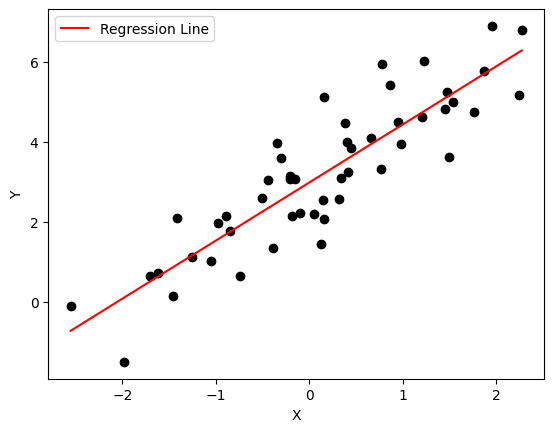

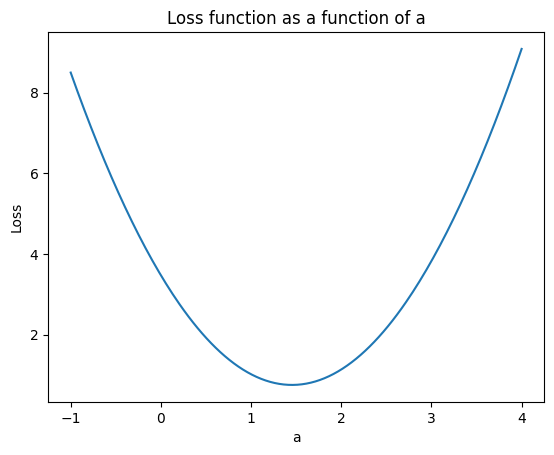

In [7]:
L = 0.01 # learning rate
epochs = 1000


for i in range(epochs):
    a, b = gradient_descent(a, b, X, Y, L)

print(a, b)

plt.scatter(X, Y, c='black')
x_line = np.linspace(X.min(), X.max(), 100)
y_line = a * x_line + b


plt.plot(x_line, y_line, c='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

a_values = np.linspace(-1, 4, 200)
loss_values = [loss_function(a_val, b, X, Y) for a_val in a_values]

plt.plot(a_values, loss_values)
plt.xlabel('a')
plt.ylabel('Loss')
plt.title('Loss function as a function of a')
plt.show()